# **Explanatory Data Analysis**

## Librairies & dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.express as px
import geopandas as gpd
from wordcloud import WordCloud
from collections import Counter
target = 'salary_in_usd'

In [28]:
data = pd.read_csv('data/training.csv')
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Machine Learning Software Engineer,168000,CA,100,CA,M
1,2023,SE,FT,Data Analyst,179975,US,100,US,M
2,2022,SE,FT,Data Scientist,144000,US,100,US,M
3,2023,SE,FT,Applied Scientist,222200,US,0,US,L
4,2021,EX,FT,Head of Data,230000,RU,50,RU,L


## Stats descriptives

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3004 non-null   int64 
 1   experience_level    3004 non-null   object
 2   employment_type     3004 non-null   object
 3   job_title           3004 non-null   object
 4   salary_in_usd       3004 non-null   int64 
 5   employee_residence  3004 non-null   object
 6   remote_ratio        3004 non-null   int64 
 7   company_location    3004 non-null   object
 8   company_size        3004 non-null   object
dtypes: int64(3), object(6)
memory usage: 211.3+ KB


In [4]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3004.000000,3004,3004,3004,3004.000000,3004,3004.000000,3004,3004
unique,NaN,4,4,88,NaN,64,NaN,61,3
top,NaN,SE,FT,Data Engineer,NaN,US,NaN,US,M
freq,NaN,2033,2976,826,NaN,2409,NaN,2433,2532
mean,2022.382823,NaN,NaN,NaN,138602.813582,NaN,45.689081,NaN,NaN
std,0.684190,NaN,NaN,NaN,63171.062152,NaN,48.595573,NaN,NaN
min,2020.000000,NaN,NaN,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,97687.500000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [5]:
num = data.select_dtypes(include=['float64']).copy()
cat = data.select_dtypes(include=['bool', 'object']).copy()

In [6]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("\n")

work_year
[2022 2023 2021 2020]


experience_level
['SE' 'EX' 'EN' 'MI']


employment_type
['FT' 'PT' 'FL' 'CT']


job_title
['Machine Learning Software Engineer' 'Data Analyst' 'Data Scientist'
 'Applied Scientist' 'Head of Data' 'Applied Data Scientist'
 'Machine Learning Engineer' 'ETL Developer' 'Data Engineer'
 'Data Architect' 'Computer Vision Engineer' 'Data Science Manager'
 'Analytics Engineer' 'Machine Learning Scientist'
 'Data Analytics Manager' 'Power BI Developer' 'Research Scientist'
 'Applied Machine Learning Engineer' 'Big Data Engineer'
 'Machine Learning Developer' 'Product Data Analyst' 'AI Scientist'
 'Head of Data Science' 'MLOps Engineer' 'ML Engineer'
 'Data Science Consultant' 'Research Engineer' 'Data Operations Analyst'
 'Data Scientist Lead' 'Data Science Lead' 'BI Analyst'
 'Data Analytics Engineer' 'Machine Learning Infrastructure Engineer'
 'Business Intelligence Engineer' 'Data Specialist'
 'Computer Vision Software Engineer' 'ETL Engineer'
 'Autonomous 

## Visualization

In [7]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [8]:
fig = px.box(data, x='company_size', y='salary_in_usd', color='company_size', title='Salary distribution by company_size')
fig.show()

In [9]:
comp_by_sal = data.groupby('company_size')[target].mean().sort_values(ascending=False).reset_index()
fig = px.bar(comp_by_sal, x='company_size', y='salary_in_usd', color='company_size', title='Salary distribution by company_size')
fig.show()

Les salaires dans les entreprises de taille moyenne et grande sont plus élevés et plus variés que dans les petites entreprises. Les petites entreprises semblent offrir des salaires plus bas mais plus homogènes.

In [10]:
exp_by_sal = data.groupby('experience_level')[target].mean().sort_values(ascending=False).reset_index()
fig = px.bar(exp_by_sal, x='experience_level', y='salary_in_usd', color='experience_level', title='Salary distribution by experience_level')
fig.show()

In [11]:
bar = data.groupby('employment_type')[target].mean().sort_values(ascending=False).reset_index()
fig = px.bar(bar, x='employment_type', y=target, color='employment_type', title='Avg salary by employment_type')
fig.show()

Les employés en Full-time (FT) ont un salaire moyen nettement plus élevé que ceux en Part-time (PT), Freelance (FL) et Contract (CT). Les FT bénéficient généralement de meilleurs salaires.

In [12]:
bar = data.groupby('company_location')[target].mean().reset_index().sort_values(by=target, ascending=False)
fig = px.bar(bar.head(10), x='company_location', y=target, color='company_location', title='Avg salary by company_location')
fig.show()

In [13]:
group_df = data.groupby('remote_ratio')[target].mean()
fig = px.bar(group_df, x=group_df.index, y=group_df.values, 
             color=group_df.index, title='Avg salary by remote_ratio')
fig.show()

Les employés ayant un ratio de télétravail (TT) très élevé (100%) ont des salaires moyens moins élevés, tandis que ceux travaillant moins à distance (20%) ont des salaires plus haut. En gros, une plus grande flexibilité de TT pourrait être associée à de plus bas salaires

In [14]:
fig = px.histogram(data, x=target, title='Distribution des salaires',
                   labels={target: 'Salaire en $', 'count': 'Fréquence'})
fig.show()

Il y a une importante concentration de salaires autour des 100k - 150k USD, avec une fréquence plus faible à mesure que les salaires augmentent => la majorité des employés gagnent dans cette tranche

In [15]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<span style="color:red">Il n'y a aucune valeur manquante dans le dataset</span>

In [16]:
data.duplicated().max() # True => Iy a des duplicated values

np.True_

In [17]:
data.duplicated().sum()

np.int64(834)

<span style="color:red">Il y a 834 doublons dans notre jeu de données il faut les gérer</span>

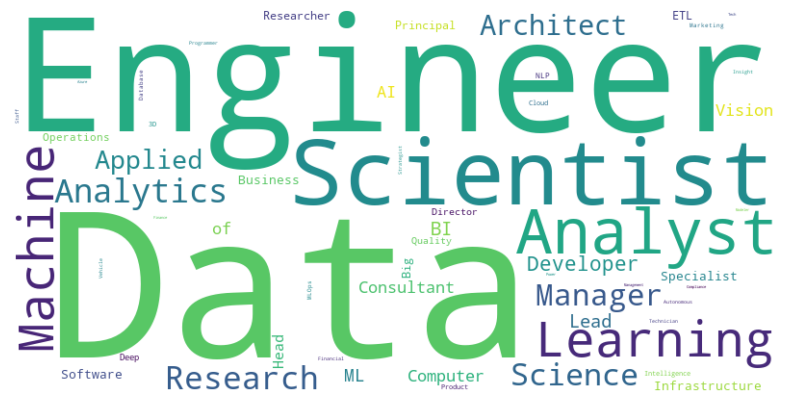

In [18]:
text = ' '.join(data['job_title'])
word_counts = Counter(text.split())
word_counts['Data'] = 2000
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Les mots "Data", "Engineer" et "Scientist" ressortent clairement, indiquant que ces postes sont les plus fréquents

In [19]:
bar = data.groupby('job_title')[target].mean().sort_values(ascending=False).reset_index()
fig = px.bar(bar, x='job_title', y=target, color='job_title', title='Avg salary by job_title')
fig.update_layout(showlegend=False)
fig.show()

In [20]:
country_sal = data[['company_location', 'salary_in_usd']]
inf = pd.read_csv('countries_iso_codes.csv')
country_sal = pd.merge(country_sal, inf, how='left', left_on='company_location', right_on='ISO_2_Letter')
country_sal = country_sal.drop(columns=['company_location', 'ISO_2_Letter'])
country_sal.rename(columns={'ISO_3_Letter':'ISO'}, inplace=True)
country_sal = country_sal[['ISO', 'Country', target]]
country_sal = country_sal.groupby(['ISO', 'Country'])[target].mean().reset_index()
country_sal.head()

,ISO,Country,salary_in_usd
0,ALB,Albania,10000.000000
1,ARE,United Arab Emirates,100000.000000
2,ARG,Argentina,25000.000000
3,AUS,Australia,80033.428571
4,AUT,Austria,84891.000000


In [21]:
path = 'shp/ne_10m_admin_0_countries.shp'
world = gpd.read_file(path)
world = world[['ISO_A3', 'NAME', 'geometry']]
world = world.set_index('ISO_A3').join(country_sal.set_index('ISO'))
world = world.reset_index()[['ISO_A3', 'NAME', 'geometry', 'salary_in_usd']]
def categorize(i):
    if 0 <= i < 50000:
        return '0 - 50K'
    elif 50000 <= i < 100000:
        return '50K - 100K'
    elif 100000 <= i < 150000:
        return '100K - 150K'
    elif 150000 <= i:
        return '150K +'
    else:
        return 'missing values'

world['category'] = world['salary_in_usd'].apply(categorize)

In [22]:
color_map = {
    'missing values': '#d3d3d3',
    '0 - 50K' : '#f9f7d1',
    '50K - 100K' : '#a3d8b2',
    '100K - 150K' : '#6fbfc6',
    '150K +': '#2b7eaf'
}

In [23]:
world['color'] = world['category'].map(color_map)
fig = px.choropleth(world, locations='ISO_A3', color='category', color_discrete_map= color_map,
                    hover_data={'NAME': True,'salary_in_usd': True,'category': False}
)

fig.update_layout(
    legend_title_text='catégories',
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show()

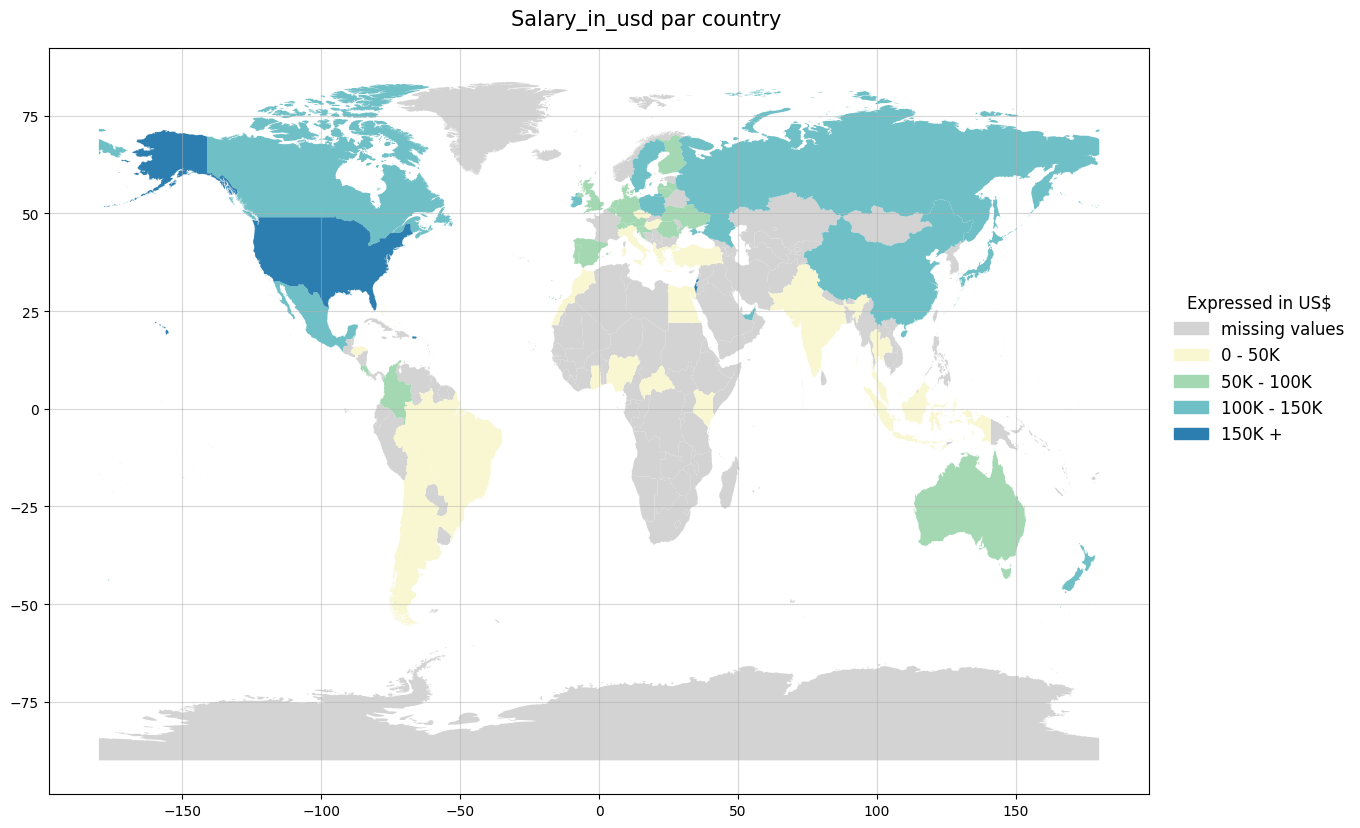

In [24]:
world = world.dropna(subset='geometry')
fig, ax = plt.subplots(figsize=(14, 8))
legend_patches = []
for cat, color in color_map.items():
    subset = world[world['category'] == cat]
    subset.plot(ax=ax, color=color, label=cat)
    legend_patches.append(Patch(color=color, label=cat))

fig.text(0.5, 1.03, 'Salary_in_usd par country', 
         fontsize=15, va='top', ha='center')

plt.legend(handles=legend_patches, bbox_to_anchor=(1.1, 0.45),
           loc='lower center', ncol=1, fontsize=12, 
           title='Expressed in US$',
        title_fontsize=12, frameon=False)

ax.axis('on')
ax.grid(True, alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

In [25]:
job_keywords = {
    'Engineer': ['Engineer', 'Developer', 'Architect', 'ETL', 'MLOps', 'Infrastructure'],
    'Analyst': ['Analyst', 'BI', 'Data Analytics', 'Financial'],
    'Scientist': ['Scientist', 'Research', 'Machine Learning', 'AI', 'Deep Learning'],
    'Others': ['Manager', 'Head', 'Lead', 'Consultant', 'Specialist']
}
def categorize_job(title):
    for category, keywords in job_keywords.items():
        if any(keyword.lower() in title.lower() for keyword in keywords):
            return category
    return 'Others'
data['jobs'] = data['job_title'].apply(categorize_job)

jobs = data.groupby('jobs')[target].mean().reset_index().sort_values(by=target, ascending=False)
fig = px.bar(jobs, x= target, y='jobs', color='jobs', title='salary_in_usd by jobs')
fig.show()

In [26]:
exp = data.groupby('experience_level')[target].mean().reset_index()
fig = px.bar(exp, x= 'experience_level', y=target, color='experience_level', title='salary_in_usd by experience_level')
fig.show()

## Resume

Au final :
- No missing data
- No duplicate data
- No outliers

Donc il faut :
- Delete duplicates
- Cat variable encoding (target encoding et get_dummies)
- Data scaling